<a href="https://colab.research.google.com/github/JVUemura/adNodal/blob/main/adNodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classe adNodal:

Classe desenvolvida pelo autor que calcula as principais matrizes para estudos de SEP.

In [31]:
import pandas as pd
import numpy as np

class adNodal():
  """
  Classe adNodal:
  
  Parâmetros de entrada: 
  - b   (dic) Base de dados do sistema
  - ref (int) Número da barra de referência do sistema
  - y   (boll) Referênte a entrada de admitâncias [OPCIONAL]

  Parâmetros de saída: [Após a execução do método run()]
  - Atributo 'A' - Matriz incidencia reduzida do sistema
  - Atributo 'Ypri' - Matriz de admitancias primitivas do sistema
  - Atributo 'Zpri' - Matriz de impedancias primitivas do sistema
  - Atributo 'Ybarra' - Matriz de admitancias do sistema
  - Atributo 'Zbarra' - Matriz de impedancias do sistema

  Formato do dicionario b:
  b = {
     'elemento': (int) Número de elementos,
     'de':   (lista) Lista de barras,
     'para': (lista) Lista de barras,
     'x':    (lista) Lista de impedancias/admitancias
     }

  """
  def __init__(self, b, ref, **kwargs):
    self.b = b
    self.bRef = ref
    self.dC = 0
    self.dL = 0
    self.A = 0
    self.Ypri = 0
    self.Zpri = 0
    self.Ybarra = 0
    self.Zbarra = 0
    if kwargs['y']:
      self.b['x'] = self.b['x']**-1

  def incidencia(self):
    # Determinando a dimenssão da matriz incidência:
    if max(self.b['de']) > max(self.b['para']):
      dL = int(max(self.b['de']))
    else:
      dL = int(max(self.b['para']))

    dC = len(self.b['elemento'])

    self.dC = dC
    self.dL = dL

    # Criando a matriz incidência vazia:
    A = np.zeros((dL,dC))

    # Preenchendo a matriz incidência:
    for kc in range(dC):
      A[self.b['de'][kc]-1, kc] = -1
      A[self.b['para'][kc]-1, kc] = 1

    # Obtendo incidência reduzida:
    self.A = np.delete(A,(self.bRef-1), axis = 0)

  def primitivas(self):
    # Criando a matriz Zpri vazia:
    Zpri = np.zeros((self.dC,self.dC), dtype = "complex_")

    # Preenchendo Zpri:
    for k in range(self.dC):
      Zpri[k,k] = (self.b['x'][k])

    # Deteminando Ypri:
    Ypri = np.linalg.inv(Zpri)

    self.Zpri = Zpri
    self.Ypri = Ypri

  def barra(self):
    # Determinando Ybarra:
    Ybarra = np.dot(np.dot(self.A, self.Ypri),np.ndarray.transpose(self.A))

    # Verificando se há linhas nulas:
    dimNull = []
    for x in range(self.dL-1):
      if max(abs(Ybarra[x,:])) == 0 and max(abs(Ybarra[:,x])) == 0:
        dimNull.append(x)
    for j in dimNull:
      Ybarra = np.delete(Ybarra,(j), axis = 0)
      Ybarra = np.delete(Ybarra,(j), axis = 1)

    self.Ybarra = Ybarra

    # Determinando Zbarra:
    Zbarra = np.linalg.inv(Ybarra)
    self.Zbarra = Zbarra
    
  def run(self):
    self.incidencia()
    self.primitivas()
    self.barra()


## Exercício:

Equacionar a matriz Ybarra para o sistema seguinte, sendo a lei de formação para as admitâncias dada por

$$y_i = (0,1\,i) + j\,(i)$$

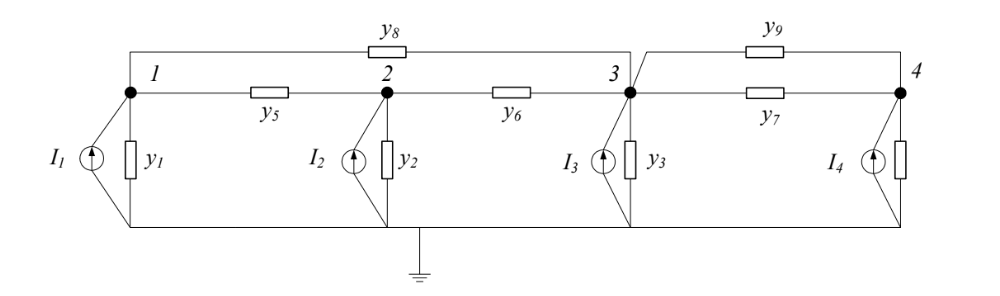

In [32]:
# Lei de formação:
y = []
for k in range(1,9):
  y_ = (0.1*k + k*1j)
  y.append(y_)

y_p = (y[6]*y[7])/(y[6]+y[7])
y_org = [y[4],y[7],y[0],y[5],y[1],y_p,y[2],y[3]]


In [33]:
# Banco de dados:
num_elementos = 8
s0 = {
     'elemento': range(num_elementos),
     'de':   [1,1,1,2,2,3,3,4],
     'para': [2,3,5,3,5,4,5,5],
     'x':    y_org
     }

# Instanciando objeto da classe adNodal
sist0 = adNodal(pd.DataFrame(s0), 5, y=True)
sist0.run()

## Solução do exercício:

In [34]:
# Ybarra
pd.DataFrame(sist0.Ybarra)

,0,1,2,3
0,1.4+14.0j,-0.5-5.0j,-0.800000-8.000000j,0.000000+0.000000j
1,-0.5-5.0j,1.3+13.0j,-0.600000-6.000000j,0.000000+0.000000j
2,-0.8-8.0j,-0.6-6.0j,2.073333+20.733333j,-0.373333-3.733333j
3,0.0+0.0j,0.0+0.0j,-0.373333-3.733333j,0.773333+7.733333j
